In [1]:
# Import Packages I will need
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# To show plots in notebook
%matplotlib inline  

from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
path = '/Users/Joe/dropbox/'
bush_df = pd.read_csv(path + 'Bush.csv')
reagan_df = pd.read_csv(path + 'Reagan.csv')

In [3]:
minimum = reagan_df['Julian'].min() # Smallest Julian Date
maximum = reagan_df['Julian'].max() # Maximum Julian Date

In [4]:
reagan_df['NormalisedDate'] = (reagan_df['Julian'] - minimum) / (maximum - minimum) 

In [5]:
reagan_df['CountDays'] = reagan_df['Julian'] - minimum

In [6]:
reagan_df['CountDaysN'] = reagan_df['CountDays'] / 365

In [7]:
# NEED TO DROP DATA COLUMNS HERE BEFORE RUN MODEL
reagan_df = reagan_df.drop(['Unnamed: 0', 'Filename', 'index','Date', 'JDate', 'Julian',
                           'NormalisedDate', 'CountDays'], axis=1)

In [8]:
target = reagan_df['CountDaysN']

In [9]:
max_target = target.max()

In [10]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(185, (1e-2, 1e4))
# kernel = RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=15)

In [11]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(reagan_df, target, test_size=0.20)

In [12]:
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
# How does this work?
space = np.linspace(0, max_target, max_target*100).T

/Users/Joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


In [13]:
target = np.asarray(y_train)
variables = np.asarray(X_train)

In [14]:
# Fit to data using Maximum Likelihood Estimation of the parameters
model = gp.fit(variables, target) # This looks fine according to documentation

In [15]:
y_pred, sigma = gp.predict(np.asarray(X_test), return_std=True)

<ErrorbarContainer object of 3 artists>

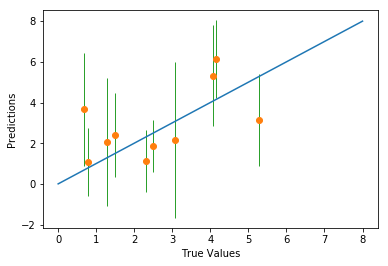

In [16]:
# The plot
plt.figure()
xs = [x for x in range(0, 9)]
ys = [x for x in range(0, 9)]
plt.plot(xs, ys)
plt.plot(y_test, y_pred, 'o', linestyle='None')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis(xscale = 0, yscale = 0)
plt.errorbar(y_test, y_pred, yerr=sigma, elinewidth=1, fillstyle='full', linestyle ='None')

In [17]:
sqErr = (y_test - y_pred)**2

In [18]:
df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'sigma': sigma, 'Squared Error': sqErr})

In [19]:
df

,y_test,y_pred,sigma,Squared Error
3,0.671233,3.661315,2.795350,8.940593
21,3.065753,2.152101,3.826101,0.834760
18,2.487671,1.858237,1.297224,0.396188
11,1.493151,2.399639,2.079965,0.821722
16,2.295890,1.119140,1.509342,1.384741
28,4.142466,6.133025,1.911510,3.962325
35,5.271233,3.128654,2.249346,4.590646
27,4.065753,5.310999,2.481995,1.550636
9,1.284932,2.057675,3.145748,0.597132
4,0.780822,1.074909,1.664590,0.086487


In [20]:
MSE = sum(sqErr) / len(sqErr)

In [21]:
MSE

2.3165229252721677

In [22]:
gp.kernel

1**2 * RBF(length_scale=185)

In [23]:
gp.kernel_

4.24**2 * RBF(length_scale=178)